# FORTRAN Code example, written into fortran_interface.f90

In [1]:
%%writefile fortran_interface.f90
module fortran_module
    use iso_c_binding, only: c_double
    implicit none
contains
    function f_sin_cos(x) result(f) bind(C, name="f_sin_cos")
        implicit none
        real(c_double), intent(in) :: x
        real(c_double) :: f
        f = sin(x) * cos(x)
    end function f_sin_cos
end module fortran_module

Writing fortran_interface.f90


## Compile fortran based on gfortran (this needs to be installed)

In [3]:
!gfortran -shared -fPIC fortran_interface.f90 -o fortran_interface.so

## Now use FORTRAN within python based on ctypes, part of the Python standard library

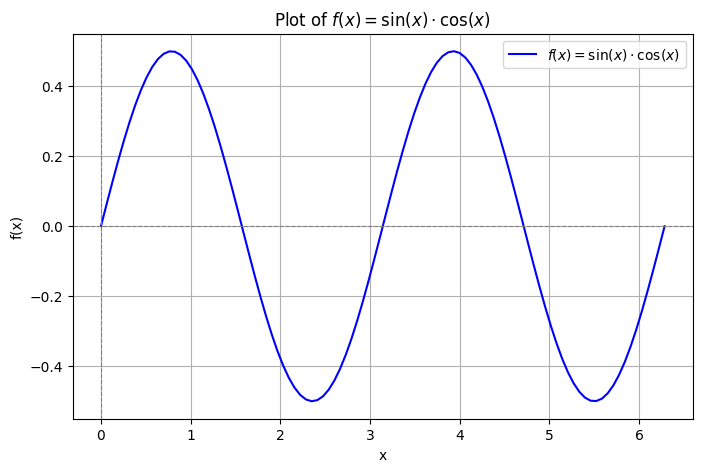

In [7]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the compiled Fortran shared library
fortran_lib = ctypes.CDLL("./fortran_interface.so")

# Define function prototype
fortran_lib.f_sin_cos.argtypes = [ctypes.POINTER(ctypes.c_double)]
fortran_lib.f_sin_cos.restype = ctypes.c_double

# Generate 100 values of x between 0 and 2 pi
x_values = np.linspace(0, 2 * np.pi, 100)
y_values = np.zeros_like(x_values)

# Compute f(x) for each x, ensuring we pass it as a pointer
for i, x in enumerate(x_values):
    x_c = ctypes.c_double(x)  # Convert to C double
    y_values[i] = fortran_lib.f_sin_cos(ctypes.byref(x_c))  # Pass by reference

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=r"$f(x) = \sin(x) \cdot \cos(x)$", color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Plot of $f(x) = \sin(x) \cdot \cos(x)$")
plt.axhline(0, color='gray', linestyle="--", linewidth=0.8)
plt.axvline(0, color='gray', linestyle="--", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()